# Introduction to Synthetic Aperture Radar Using Python and MATLAB

## by Andy Harrison - &copy; Artech House 2022

---

## Example 2.12.3 Stripmap SAR Point Spread Function
---

**Import modules**

In [1]:
%matplotlib inline

import numpy as np

from scipy.constants import speed_of_light, pi

from matplotlib import pyplot as plt

**Set the waveform bandwidth (Hz)**

In [2]:
waveform_bandwidth = 20e6

**Set the operating frequency (Hz)**

In [3]:
operating_frequency = 1e9

**Set the cross-range resolution (m)**

In [4]:
cross_range_resolution = 4

**Calculate the antenna azimuth dimension (m)**

In [5]:
Da = 2 * cross_range_resolution;

**Set the point target location (m)**

In [6]:
x_target = 5

y_target = 2

**Calculate the minimum and maximum wavelengths (m)**

In [7]:
wavelength_min = speed_of_light / (operating_frequency + 0.5 * waveform_bandwidth)

wavelength_max = speed_of_light / (operating_frequency - 0.5 * waveform_bandwidth)

**Calculate the minimum and maximum wavenumber (rad/m)**

In [8]:
k_min = 2 * pi / wavelength_max

k_max = 2 * pi / wavelength_min

k_c = speed_of_light / operating_frequency

**Calculate the spectral support using**

\begin{align}
\Delta k_x &= 2 \big( k_{max} - k_{min} \big)\hspace{0.1in}\text{(rad/m)}\hspace{0.2in}(2.8)\\ \\ \Delta k_y &= \frac{4\pi}{D_a}\hspace{0.1in}\text{(rad/m)}\hspace{0.2in}(2.9)
\end{align}

In [9]:
dkx = 2 * (k_max - k_min)

dky = 4 * pi / Da

**Set up the x and y grid (m)**

In [10]:
x = np.linspace(-20, 20, 1000)

y = np.linspace(-20, 20, 1000)

[xs, ys] = np.meshgrid(x, y)

**Calculate the point-spread function from**

\begin{equation}
\textrm{psf}=\textrm{sinc}\left(\frac{\Delta \;k_x x \;}{2\;\pi \;}\right)\textrm{sinc}\left(\frac{\Delta \;k_y y \;}{2\pi \;}\right)\hspace{0.2in}(2.10)
\end{equation}

In [11]:
psf = np.sinc(dkx * (xs - x_target) / (2 * pi)) * np.sinc(dky * (ys - y_target) / (2 * pi));

**Plot the results**

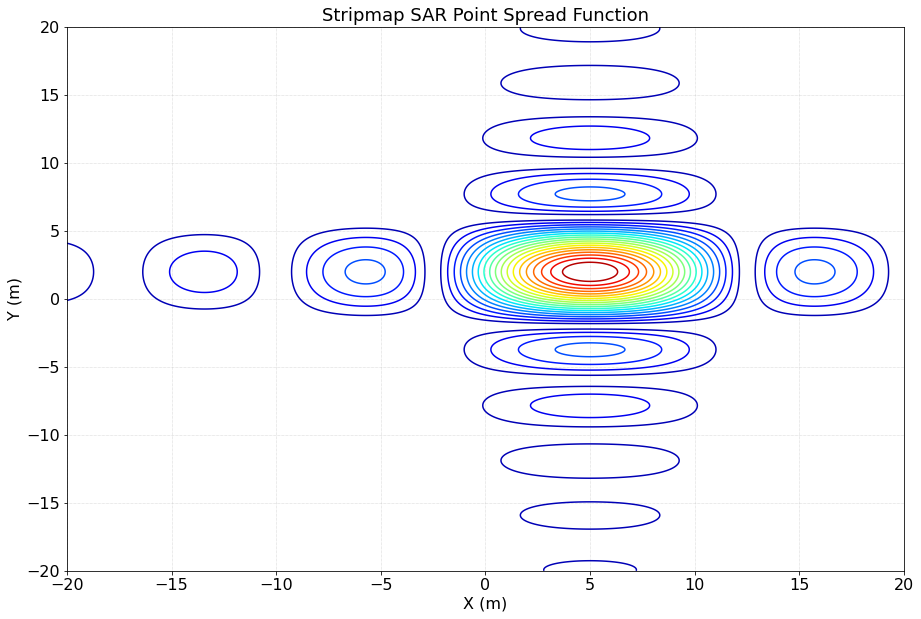

In [12]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the contour plot

plt.contour(xs, ys, abs(psf), 20, cmap='jet')


# Set the plot title and labels

plt.title('Stripmap SAR Point Spread Function', size=18)

plt.xlabel('X (m)', size=16)

plt.ylabel('Y (m)', size=16)


# Set the tick label size

plt.tick_params(labelsize=16)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Display the figure

plt.show()